In [48]:
# Gerekli Kütüphanelerin Yüklenmesi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('D:/softwareDev/hangiKrediData/hiringChallenge/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
url = "D:/softwareDev/hangiKrediData/hiringChallenge/term-deposit-marketing.csv"
from sklearn import preprocessing
#from sklearn.processing import skimage, MinMaxScaler, StandartScaler

data = pd.read_csv(url)
print(data.shape)
data.head()

D:/softwareDev/hangiKrediData/hiringChallenge/hangiKrediDataChallenge.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/term-deposit-marketing.csv
D:/softwareDev/hangiKrediData/hiringChallenge/.ipynb_checkpoints\hangiKrediDataChallenge-checkpoint.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.gitattributes
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\anengineerHangiKrediDataChallenge.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\hangiKrediDataChallenge.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\LICENSE
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\README.md
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\term-deposit-marketing.csv
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\COMMIT_EDITMSG
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\config
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\description

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


1) Age : Müşterilerin yaşı

2) Job : Müşterinin mevcut çalıştığı iş

3) Marital : Müşterinin medeni hali

4) Education : Müşterinin eğitim durumu

5) Default : Çoğu kişinin kredi taahhüt yoktur, bu da onların yaklaşabilecekleri anlamına gelir.

6) Balance : Yıllık ortalama gelirleri (€)

7) Housing : Müşterinin evinin olup olmaması

8) Loan : Mevcutta bir kredisi olup olmaması

9) Contact : İletişim bilgileri

10) Day : ay sonu durumu

11) Month : en son hangi ayda müşteri ile iletişime geçildiği bilgisi

12) Duration : en son iletişime geçildiğinde müşterinin konuşma süresi (sn)

13) Campaign : müşteri ile bankadan kaç kişinin iletişime geçtiği bilgisi

In [50]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


### Kategorik Değişken Analizi

In [51]:
def bar_plot(variable):
    
    #get feature
    var = data[variable]
    # katogorik değişkenlerin sayısı
    varValue = var.value_counts()
    
    #Görselleştirme
    
    plt.figure(figsize =(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print(" {}: \n {} ".format(variable,varValue))

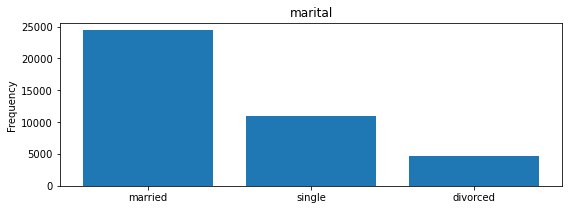

 marital: 
 married     24386
single      10889
divorced     4725
Name: marital, dtype: int64 


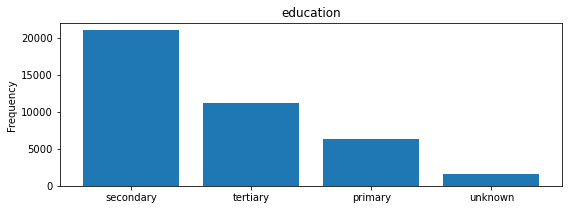

 education: 
 secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64 


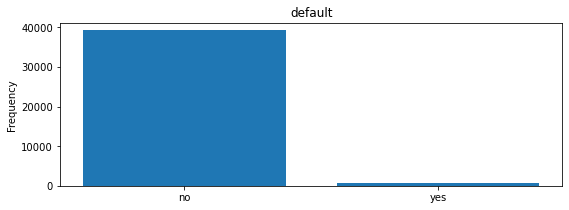

 default: 
 no     39191
yes      809
Name: default, dtype: int64 


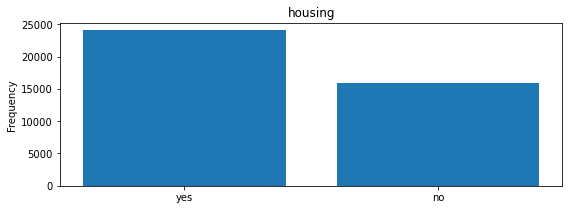

 housing: 
 yes    24031
no     15969
Name: housing, dtype: int64 


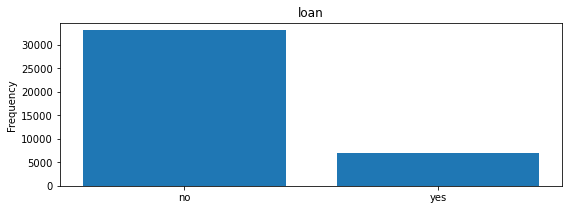

 loan: 
 no     33070
yes     6930
Name: loan, dtype: int64 


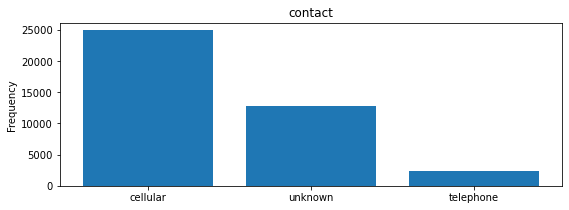

 contact: 
 cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64 


In [52]:
category1 =["marital","education","default","housing","loan","contact"]
for c in category1:
    bar_plot(c)

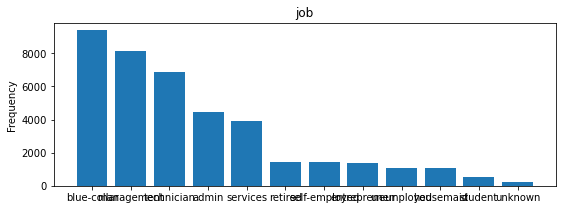

 job: 
 blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64 


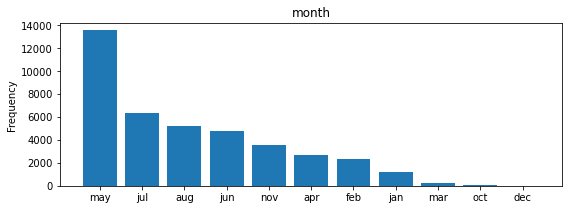

 month: 
 may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64 


In [53]:
category2 =["job", "month"]
for c in category2:
    bar_plot(c)

### Sayısal Değişken Analizi

In [54]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 100)
    plt.xlabel(variable)
    plt.ylabel("Frequance")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

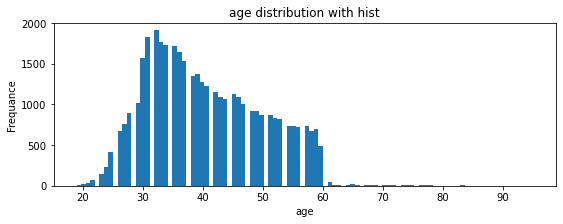

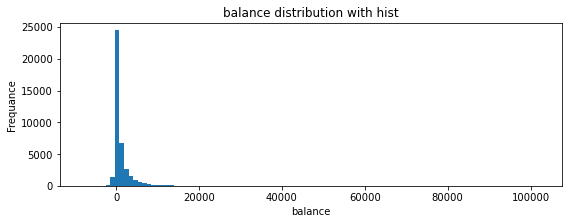

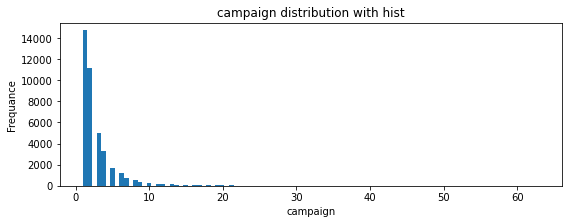

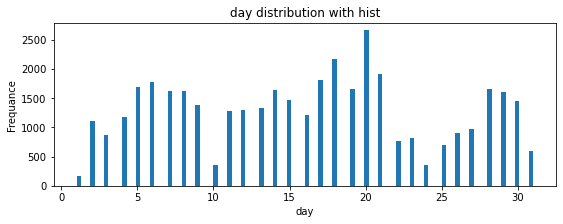

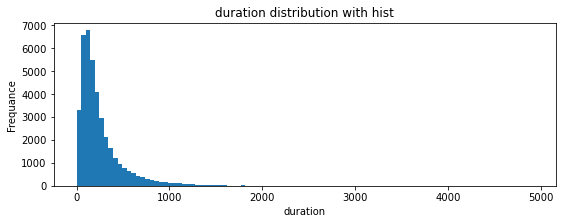

In [55]:
numericVar = ["age","balance","campaign","day","duration"]
for n in numericVar:
    plot_hist(n)

In [56]:
# education - y arasındaki ilişki nedir?

data[["duration","age","y"]].groupby(["age"], as_index = False).mean().sort_values(by="age",ascending=False)
# müşterilerin eğitimi ile vadeli hesap açmaları arasındaki analizin yapılması.
# mean() ilgili değişkenlerin ortalamasını alıyor
# sort_values() değişkenleri büyükten küçüğe doğru sıralaması yapıyoruz

,age,duration
69,95,207.000000
68,94,212.000000
67,90,152.000000
66,86,141.000000
65,85,312.000000
...,...,...
4,23,295.288591
3,22,254.478873
2,21,186.923077
1,20,201.045455


Buradan yapılabilecek çıkarım, müşterileri ne kadar ikna edebilirsek o kadar bankanın ürününü alabilir

### Aykırılık Tespiti

Kullanılacak olan verisetlerinde herhangi bir şekilde ortalamaya kötü yönde etki edecek verinin tespitini yapmak.

In [57]:
def detect_outliers(df,features):
    outlierIndices = []
    
    for c in features:
        # Q1
        Q1 = np.percentile(df[c],25)
        # Q3
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier Step
        outlierStep = IQR * 1.5
        # detect outlier and their indices
        outlierListCol = df[(df[c] < Q1 - outlierStep) | (df[c] > Q3 + outlierStep )].index
        # store indeces
        outlierIndices.extend(outlierListCol)
        
    outlierIndices = Counter(outlierIndices)
    
    multipleOutliers = list(i for i, v in outlierIndices.items() if v > 2)
    
    return multipleOutliers

In [58]:
data.loc[detect_outliers(data,["age","balance","campaign","day","duration"])]

# outlier alırken "nümerik" değer almazsa hata veriyor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
31285,79,retired,married,secondary,no,8304,no,no,telephone,9,mar,303,9,yes
32689,74,management,married,tertiary,no,4515,no,no,telephone,17,apr,1161,5,no
1917,35,management,single,secondary,no,6809,yes,no,unknown,9,may,750,7,no
3364,53,management,married,tertiary,no,4928,yes,no,unknown,15,may,738,7,no
7728,35,technician,divorced,secondary,no,5724,yes,no,unknown,30,may,691,10,yes
11230,48,admin,married,secondary,no,17957,no,no,unknown,18,jun,700,7,no
12245,49,unknown,married,secondary,no,4846,no,no,unknown,20,jun,638,9,no
16827,34,blue-collar,married,secondary,no,3990,yes,no,cellular,24,jul,633,7,no
17130,39,technician,married,secondary,no,10685,yes,no,cellular,25,jul,1369,9,yes
17841,48,management,married,tertiary,no,14530,yes,yes,telephone,29,jul,863,10,no


In [59]:
#drop outlier

data = data.drop(detect_outliers(data,["age","balance","campaign","day","duration"]),axis = 0).reset_index(drop = True)
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


### Kayıp Verilerin Temizlenmesi

 * Kayıp Verilerin Bulunması

 * Kayıp Verilerin Doldurulması

verilerimizin içinde herhangi bir kayıp verinin olmadığını gördük, buradan bir sonraki analiz aşaması olan "Normalleştirme" yöntemine geçebiliriz

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y = data[['y']]
X = data.drop(['y'], axis=1)
#y = data['y'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')

In [64]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')

In [65]:
y_train.head()

,y
31003,no
24778,no
17259,no
10989,no
25681,no


In [66]:
y_test.head()

,y
7602,no
9287,no
37271,no
33058,no
22916,no


### Eğitim ve Test verilerinin Dağıtımı

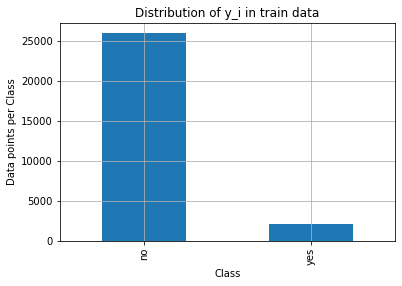

Number of data points in class 2 : 25922 ( 92.628 %)
Number of data points in class 3 : 2063 ( 7.372 %)
--------------------------------------------------------------------------------


In [67]:
def plot_distribution(class_distribution,title,xlabel,ylabel):
    class_distribution.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()


plot_distribution(train_class_distribution,
                 'Distribution of y_i in train data',
                 'Class',
                 'Data points per Class')

#  ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+2, ':',train_class_distribution.values[i], 
          '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
    
print('-'*80)

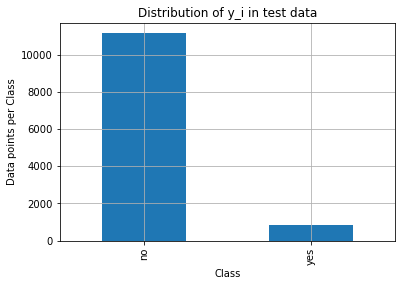

Number of data points in class 1 : 11170 ( 93.13 %)
Number of data points in class 2 : 824 ( 6.87 %)
--------------------------------------------------------------------------------


In [68]:
plot_distribution(test_class_distribution,
                 'Distribution of y_i in test data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], 
          '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)

In [69]:
data = pd.concat([X_train, y_train], axis=1)

In [70]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
31003,59,blue-collar,married,primary,no,1723,no,no,cellular,10,feb,39,3,no
24778,33,blue-collar,married,secondary,no,24,yes,no,cellular,18,nov,184,1,no
17259,39,blue-collar,married,primary,no,643,no,yes,cellular,28,jul,24,14,no
10989,56,entrepreneur,divorced,tertiary,no,22946,no,no,unknown,17,jun,75,3,no
25681,33,management,single,tertiary,no,201,yes,no,cellular,19,nov,171,1,no


In [71]:
data_1= pd.concat([X_test, y_test], axis=1)

In [72]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
7602,43,blue-collar,married,primary,yes,1202,no,no,unknown,30,may,295,1,no
9287,40,entrepreneur,married,primary,no,4674,no,no,unknown,5,jun,160,2,no
37271,37,blue-collar,married,secondary,no,0,yes,no,cellular,13,may,54,1,no
33058,37,blue-collar,married,secondary,no,16727,yes,no,cellular,20,apr,152,2,no
22916,47,admin,married,secondary,no,175,yes,no,cellular,26,aug,102,7,no


Şimdi, 'Job' ve 'Education'daki eksik değerleri çıkarmak için, 'Job' ve 'Education' arasındaki çapraz tablodan yararlanıyoruz. Buradaki hipotezimiz, 'Job'in bir kişinin 'Education'dan etkilendiğidir. Dolayısıyla, kişinin eğitimine dayanarak 'Job' çıkarabiliriz. Ayrıca, sadece eksik değerleri doldurduğumuz için nedensel çıkarımla fazla ilgilenmiyoruz. Bu nedenle, işi eğitimi tahmin etmek için kullanabiliriz.

In [73]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [74]:
cross_tab(data,'job','education')

,primary,secondary,tertiary,unknown
job,,,,
admin,147,2612,279,97
blue-collar,2508,3624,90,312
entrepreneur,123,367,465,53
housemaid,374,237,107,28
management,194,721,4704,136
retired,350,451,162,41
self-employed,95,374,487,22
services,245,2307,105,88
student,14,187,99,53


In [75]:
data['job'][data['age']>60].value_counts()

retired          111
management        14
housemaid         11
technician         6
blue-collar        4
self-employed      3
entrepreneur       1
unemployed         1
Name: job, dtype: int64

In [76]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='admin'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='blue-collar'), 'education'] = 'primary'
data.loc[(data['education']=='unknown') & (data['job']=='entrepreneur'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'primary'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='self-employed'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='student'), 'education'] = 'primary'
data.loc[(data['education']=='unknown') & (data['job']=='technician'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='unemployed'), 'education'] = 'primary'
data.loc[(data['job'] == 'unknown') & (data['education']=='primary'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='secondary'), 'job'] = 'technician'
data.loc[(data['job'] == 'unknown') & (data['education']=='tertiary'), 'job'] = 'management'

In [77]:
cross_tab(data,'job','education')

,primary,secondary,tertiary,unknown
admin,147.0,2709.0,279.0,0.0
blue-collar,2851.0,3624.0,90.0,0.0
entrepreneur,123.0,367.0,518.0,0.0
housemaid,402.0,237.0,107.0,0.0
management,194.0,721.0,4862.0,0.0
retired,350.0,451.0,162.0,41.0
self-employed,95.0,374.0,509.0,0.0
services,245.0,2395.0,105.0,0.0
student,67.0,187.0,99.0,0.0
technician,113.0,3538.0,1177.0,0.0


Göründüğü gibi eksik olan "bilinmeyen" değişkeni değiştirebiliriz

### Verilerin Standartlaştırılması



In [78]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [79]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
31003,59,blue-collar,married,primary,no,1723,no,no,cellular,10,feb,39,3,no
24778,33,blue-collar,married,secondary,no,24,yes,no,cellular,18,nov,184,1,no
17259,39,blue-collar,married,primary,no,643,no,yes,cellular,28,jul,24,14,no
10989,56,entrepreneur,divorced,tertiary,no,22946,no,no,unknown,17,jun,75,3,no
25681,33,management,single,tertiary,no,201,yes,no,cellular,19,nov,171,1,no


### Kategorik değişkenler Sıralı veya Numerik olabilir

In [80]:
data['default'] = data['default'].map({'yes': 1,'unknown': -1,'no': 0})
data['housing'] = data['housing'].map({'yes': 1,'unknown': -1,'no': 0})
data['loan'] = data['loan'].map({'yes': 1,'unknown': -1,'no': 0})

### Nominal Değişkenleri İşleme (One Hot Encoding)

In [81]:
nominal = ['job', 'marital','education','default','housing','loan','contact']
data_clean = pd.get_dummies(data,columns=nominal)
data_clean['y']=data_clean['y'].map({'yes': 1,'no': 0})
data_clean.head()

,age,balance,day,month,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,...,education_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_cellular,contact_telephone,contact_unknown
31003,59,1723,10,feb,39,3,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
24778,33,24,18,nov,184,1,0,0,1,0,...,0,1,0,0,1,1,0,1,0,0
17259,39,643,28,jul,24,14,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0
10989,56,22946,17,jun,75,3,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
25681,33,201,19,nov,171,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


In [82]:
data_clean.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'y',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [83]:
data_clean.shape

(27985, 35)

In [84]:
df_with_dummies=pd.get_dummies(data_clean)

In [85]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [86]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean = dropfeature(df_with_dummies, features_dropped)

## Sayısal alanlar için grafikler çizerek veri dağılımını analiz etme

In [87]:
data_clean.describe()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
count,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.00000,27985.000000,27985.000000,...,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000,27985.000000
mean,40.519778,1272.309023,16.039664,254.572164,2.875612,0.073718,0.112024,0.23459,0.036019,0.026657,...,0.131392,0.000322,0.058281,0.030302,0.161229,0.119028,0.006361,0.334929,0.088119,0.002037
std,9.621056,2926.088903,8.287135,258.647166,3.215439,0.261316,0.315402,0.42375,0.186341,0.161082,...,0.337834,0.017931,0.234279,0.171420,0.367749,0.323827,0.079500,0.471974,0.283472,0.045086
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,406.000000,17.000000,175.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1313.000000,21.000000,313.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
data_clean.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
31003,59,1723,10,39,3,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
24778,33,24,18,184,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17259,39,643,28,24,14,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10989,56,22946,17,75,3,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
25681,33,201,19,171,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
data_clean.shape

(27985, 41)

In [90]:
data_clean.corr()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
age,1.000000,0.080834,-0.015252,-0.040863,0.016429,-0.020429,-0.048029,-0.032837,0.032750,0.079210,...,0.088314,-0.010083,-0.000472,-0.020514,0.013966,0.090194,-0.008714,-0.128627,0.037332,0.001843
balance,0.080834,1.000000,0.006367,0.014042,-0.011313,0.027086,-0.021684,-0.045313,0.015057,0.000122,...,0.011413,0.000127,-0.007947,-0.030517,-0.072719,0.033924,0.014603,-0.055493,0.138022,0.016861
day,-0.015252,0.006367,1.000000,-0.032062,0.161005,-0.005129,-0.008987,-0.034786,-0.004257,-0.000176,...,0.044510,-0.012110,-0.318818,0.273494,0.167653,-0.212245,-0.018336,-0.047707,0.109846,0.041388
duration,-0.040863,0.014042,-0.032062,1.000000,-0.094263,0.461815,-0.012919,0.016786,0.000193,-0.003344,...,-0.046766,-0.007090,-0.015324,0.010695,0.015771,-0.018746,-0.005611,0.015371,-0.004538,0.023496
campaign,0.016429,-0.011313,0.161005,-0.094263,1.000000,-0.043779,-0.019311,-0.000745,0.001335,0.003504,...,0.177784,-0.010463,-0.035868,-0.067524,0.098616,0.046994,-0.007669,-0.093177,-0.092494,-0.026353
y,-0.020429,0.027086,-0.005129,0.461815,-0.043779,1.000000,0.004290,-0.031613,-0.003161,-0.011880,...,-0.030383,-0.005060,0.033134,-0.029128,-0.022912,-0.011636,0.135679,-0.037075,-0.012441,0.099479
job_admin,-0.048029,-0.021684,-0.008987,-0.012919,-0.019311,0.004290,1.000000,-0.196636,-0.068658,-0.058780,...,-0.080124,-0.000052,-0.003246,0.005951,0.024507,-0.009500,0.017187,0.031686,-0.005696,0.016622
job_blue-collar,-0.032837,-0.045313,-0.034786,0.016786,-0.000745,-0.031613,-0.196636,1.000000,-0.107014,-0.091618,...,-0.124706,-0.005227,-0.041617,-0.035387,-0.023727,0.029057,-0.035808,0.148333,-0.051019,-0.008177
job_entrepreneur,0.032750,0.015057,-0.004257,0.000193,0.001335,-0.003161,-0.068658,-0.107014,1.000000,-0.031989,...,-0.049637,-0.003467,0.001844,-0.008440,0.027367,0.014817,-0.013053,-0.018125,0.058299,0.004028
job_housemaid,0.079210,0.000122,-0.000176,-0.003344,0.003504,-0.011880,-0.058780,-0.091618,-0.031989,1.000000,...,0.038074,-0.002968,-0.012762,-0.007254,0.039647,0.059056,-0.002079,-0.070907,-0.013098,-0.007476


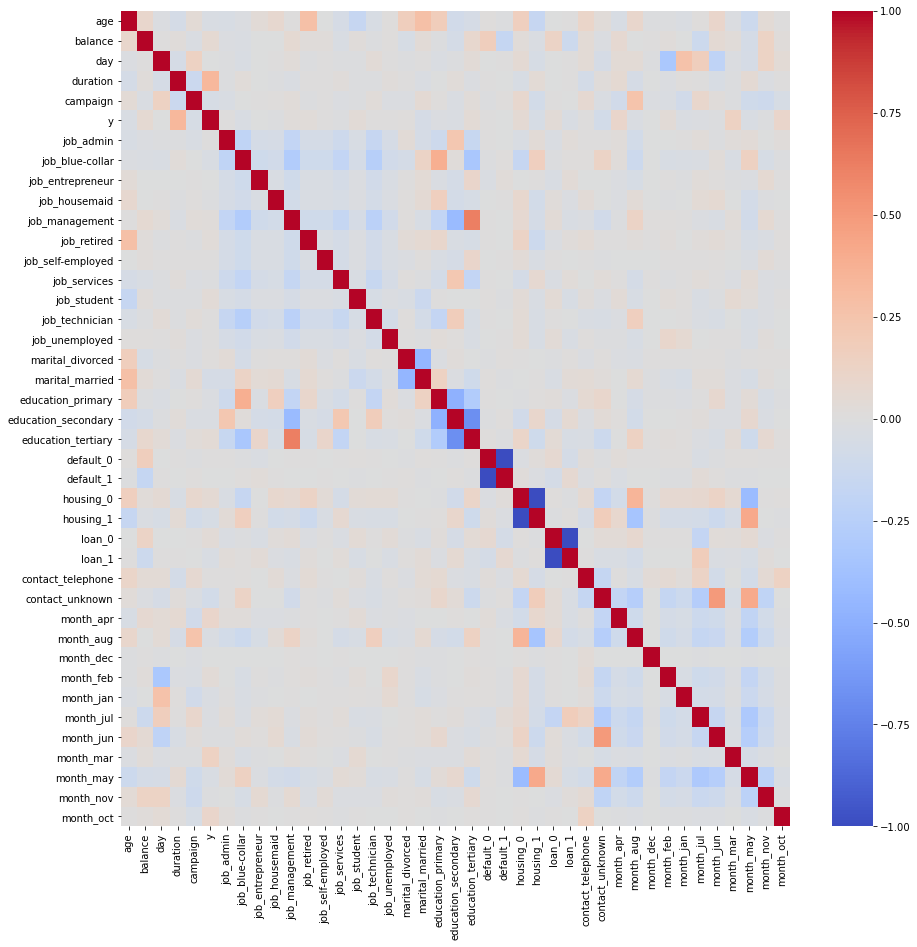

In [91]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

drawheatmap(data_clean)

In [92]:
X_train_len = len(X_train)
X_train = pd.concat([X_train, X_test],axis = 0).reset_index(drop=True)

### Çıkarımlar


Yukarıdaki ısı haritasından 'y'nin (hedef değişkenimiz) eğitim verileri ile arasındaki ilişkiyi modelleri oluştururken bu bağımsız değişkenleri önemli görmeyi bekliyoruz.

In [93]:
nominal = ['job', 'marital','education','default','housing','loan','contact']
data_clean_1 = pd.get_dummies(data_1,columns=nominal)
data_clean_1['y']=data_clean_1['y'].map({'yes': 1,'no': 0})
data_clean_1.head()

,age,balance,day,month,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
7602,43,1202,30,may,295,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
9287,40,4674,5,jun,160,2,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
37271,37,0,13,may,54,1,0,0,1,0,...,0,1,0,0,1,1,0,1,0,0
33058,37,16727,20,apr,152,2,0,0,1,0,...,0,1,0,0,1,1,0,1,0,0
22916,47,175,26,aug,102,7,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0


In [94]:
data_clean_1.shape

(11994, 35)

In [95]:
df_with_dummies=pd.get_dummies(data_clean_1)

In [96]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [97]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean_1 = dropfeature(df_with_dummies, features_dropped)

In [98]:
data_clean_1.shape

(11994, 41)

In [99]:
data_clean.shape

(27985, 41)

In [100]:
data_clean_1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'y', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct'],
      dtype='object')

In [101]:
data_clean.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'y', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_0', 'default_1', 'housing_0',
       'housing_1', 'loan_0', 'loan_1', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

## Test verilerini standartlaştırma

In [102]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [103]:
data_1= pd.concat([X_test, y_test], axis=1)

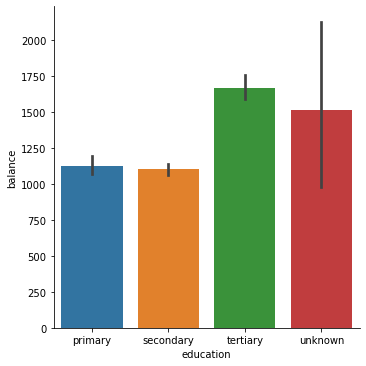

In [104]:
education = sns.factorplot(x= "education", y="balance", data = data, kind = "bar", size = 5)
plt.show()

Burada yıllık gelirin eğitim ile arasındaki bağlantıdan yola çıkarak hangi eğitim grubundaki insanların hesap açıp açmayacağını tahmin edebiliriz.

Diğer değişkenleri de kontrol edelim;

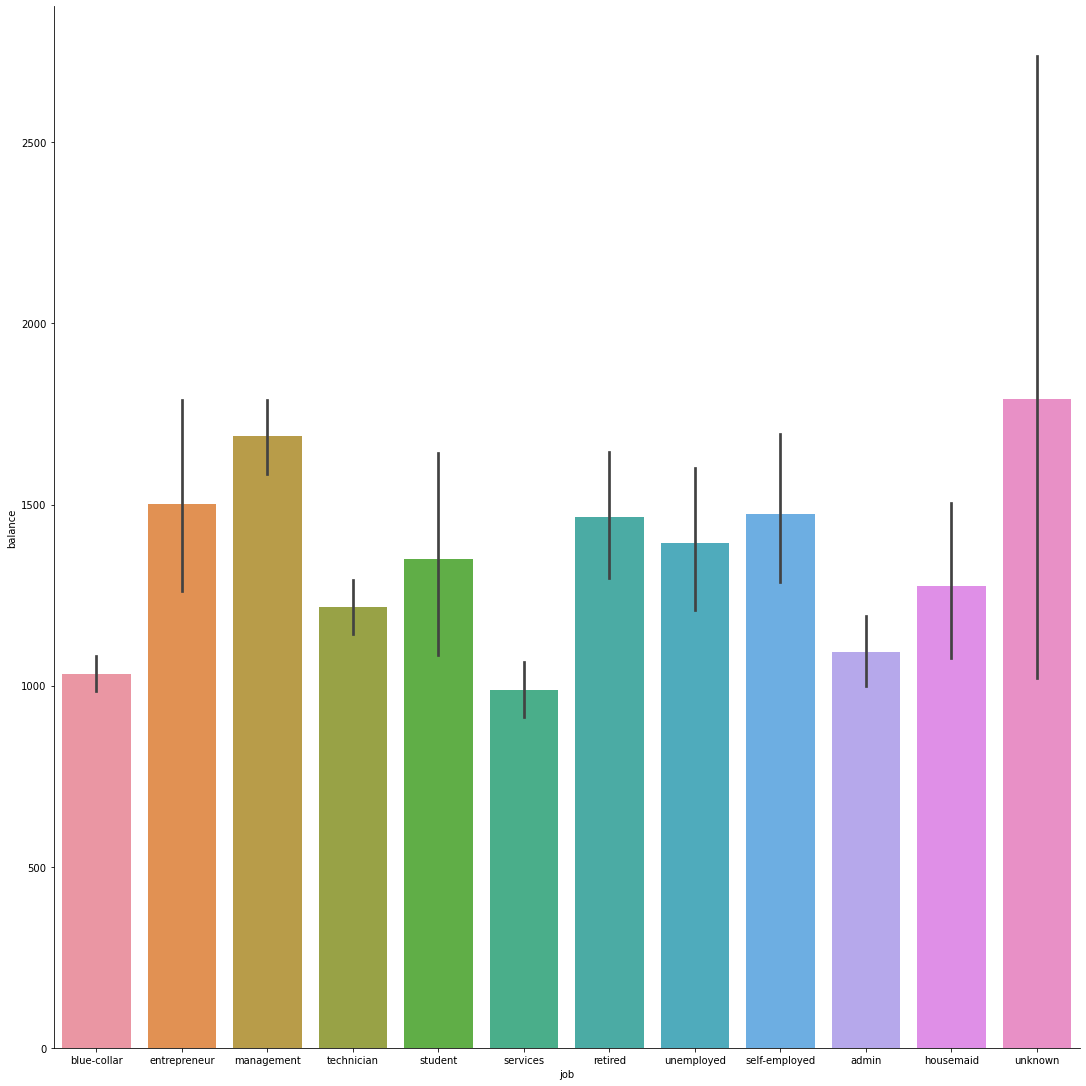

In [105]:
job = sns.factorplot(x= "job", y="balance", data = data, kind = "bar", size = 15)
plt.show()

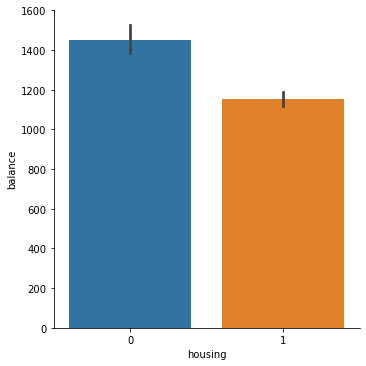

In [106]:
job = sns.factorplot(x= "housing", y="balance", data = data, kind = "bar", size = 5)
plt.show()

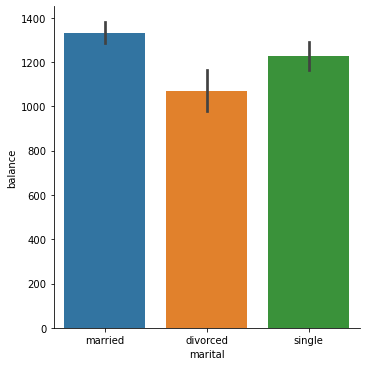

In [107]:
job = sns.factorplot(x= "marital", y="balance", data = data, kind = "bar", size = 5)
plt.show()

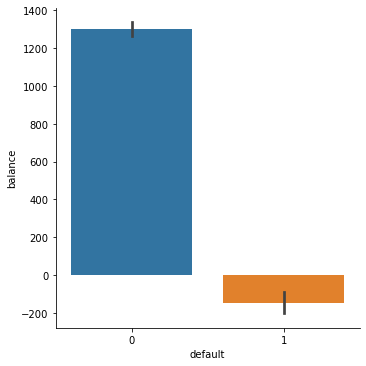

In [108]:
job = sns.factorplot(x= "default", y="balance", data = data, kind = "bar", size = 5)
plt.show()

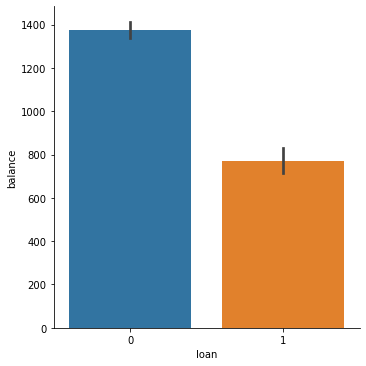

In [109]:
job = sns.factorplot(x= "loan", y="balance", data = data, kind = "bar", size = 5)
plt.show()

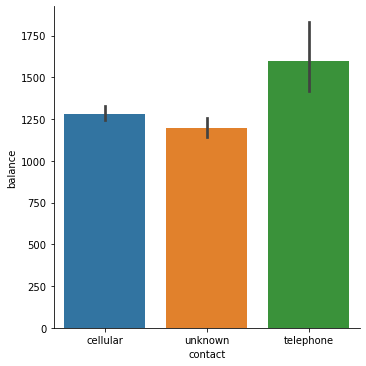

In [110]:
job = sns.factorplot(x= "contact", y="balance", data = data, kind = "bar", size = 5)
plt.show()

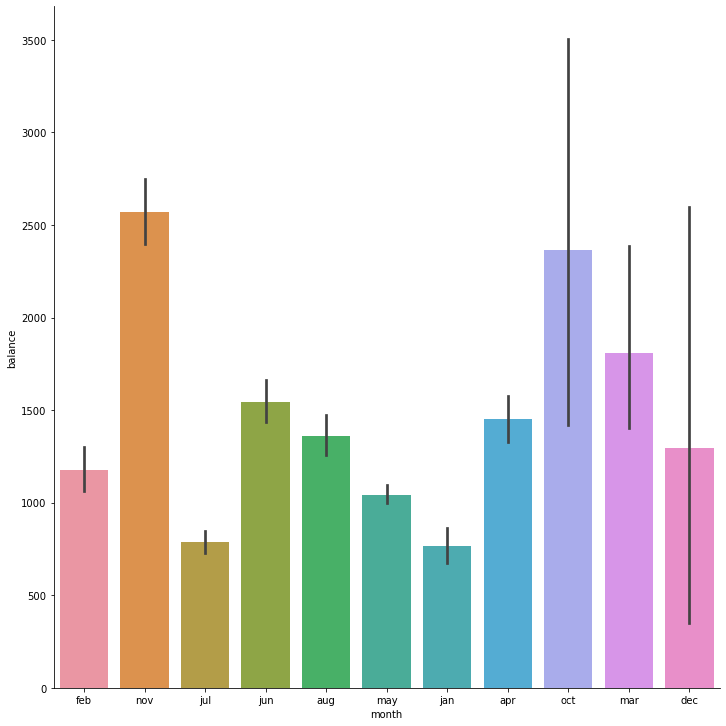

In [111]:
job = sns.factorplot(x= "month", y="balance", data = data, kind = "bar", size = 10)
plt.show()

In [112]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
31003,59,blue-collar,married,primary,0,1723,0,0,cellular,10,feb,39,3,no
24778,33,blue-collar,married,secondary,0,24,1,0,cellular,18,nov,184,1,no
17259,39,blue-collar,married,primary,0,643,0,1,cellular,28,jul,24,14,no
10989,56,entrepreneur,divorced,tertiary,0,22946,0,0,unknown,17,jun,75,3,no
25681,33,management,single,tertiary,0,201,1,0,cellular,19,nov,171,1,no


In [113]:
data = pd.get_dummies(data, columns=["education","marital","default","housing","contact","loan"])

In [114]:
data.head()

,age,job,balance,day,month,duration,campaign,y,education_primary,education_secondary,...,marital_single,default_0,default_1,housing_0,housing_1,contact_cellular,contact_telephone,contact_unknown,loan_0,loan_1
31003,59,blue-collar,1723,10,feb,39,3,no,1,0,...,0,1,0,1,0,1,0,0,1,0
24778,33,blue-collar,24,18,nov,184,1,no,0,1,...,0,1,0,0,1,1,0,0,1,0
17259,39,blue-collar,643,28,jul,24,14,no,1,0,...,0,1,0,1,0,1,0,0,0,1
10989,56,entrepreneur,22946,17,jun,75,3,no,0,0,...,0,1,0,1,0,0,0,1,1,0
25681,33,management,201,19,nov,171,1,no,0,0,...,1,1,0,0,1,1,0,0,1,0


In [115]:
# işimize yaramayacak olan index'leri çıkarttık
data.drop(labels=["age","balance","day","month","duration","campaign","job"], axis = 1,inplace = True)
data.columns

Index(['y', 'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'loan_0',
       'loan_1'],
      dtype='object')

In [116]:
data.head()

,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,default_0,default_1,housing_0,housing_1,contact_cellular,contact_telephone,contact_unknown,loan_0,loan_1
31003,no,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0
24778,no,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0
17259,no,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
10989,no,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0
25681,no,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0


# YZ Model

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [118]:
data_clean.shape

(27985, 41)

In [119]:
# Saperating features and result vectors
y_test=data_clean_1[['y']]
X_test = data_clean_1.drop(['y'], axis=1)

#y = data['y'].values

In [120]:
# Saperating features and result vectors
y_train=data_clean[['y']]
X_train = data_clean.drop(['y'], axis=1)

#y = data['y'].values

In [121]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
     from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
     classifier.fit(X_train,y_train) 
     print(classifier.score(X_test,y_test)) 
     print(confusion_matrix(y_test,classifier.predict(X_test)))
     print(accuracy_score(y_test,classifier.predict(X_test)))
     print(precision_score(y_test,classifier.predict(X_test)))
     print(recall_score(y_test,classifier.predict(X_test)))
     f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
     print("f1 score", f1)
     return classifier

In [122]:
X_train.shape

(27985, 40)

In [123]:
X_test.shape

(11994, 40)

In [124]:
# import Dummy Classifier for creating Base Model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent',random_state=0)
finalModel = Convert_Model(X_train,y_train,X_test,y_test,classifier)

0.9312989828247457
[[11170     0]
 [  824     0]]
0.9312989828247457
0.0
0.0
f1 score nan


### Lojistik Regresyon

In [125]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [126]:
# inport Dummy Classifier for creating Base Model
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

0.9373853593463398
[[11005   165]
 [  586   238]]
0.9373853593463398
0.5905707196029777
0.28883495145631066
f1 score 0.3879380603096984


AUC: 0.933


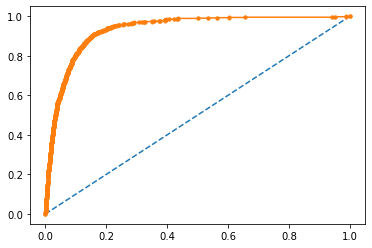

In [127]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## Random Forrest Classifier

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Random Forest Classifier Eğitimi

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(n_estimators=100)
finalModel_rfc = Convert_Model(X_train,y_train,X_test,y_test,rfc)

0.9380523595130899
[[10997   173]
 [  570   254]]
0.9380523595130899
0.594847775175644
0.308252427184466
f1 score 0.4060751398880895


AUC: 0.942


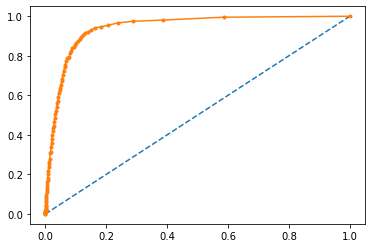

In [130]:
probs = finalModel_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [131]:
data_clean.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
31003,59,1723,10,39,3,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
24778,33,24,18,184,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17259,39,643,28,24,14,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10989,56,22946,17,75,3,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
25681,33,201,19,171,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [134]:
feature_importances

,importance
duration,0.364127
balance,0.112258
day,0.099879
age,0.098611
campaign,0.045690
month_mar,0.018449
month_apr,0.015091
marital_married,0.013593
contact_unknown,0.011975
education_secondary,0.011833


### SVM Classifier

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [139]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [140]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')

In [141]:
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,clf)

0.603112840466926
[[11068   102]
 [  669   155]]
0.9357178589294647
0.603112840466926
0.18810679611650485
f1 score 0.28677150786308975


In [142]:
print('The best model is: ', finalModel_gb.best_params_)
print('This model produces a mean cross-validated score (precision) of', finalModel_gb.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.602876909134589


## Test

In [143]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, finalModel_gb.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)
print("F1 on the evaluation set",f1_1)

precision on the evaluation set:  0.603112840466926
recall on the evaluation set:  0.18810679611650485
accuracy on the evaluation set:  0.9357178589294647
F1 on the evaluation set 0.28677150786308975


AUC: 0.589


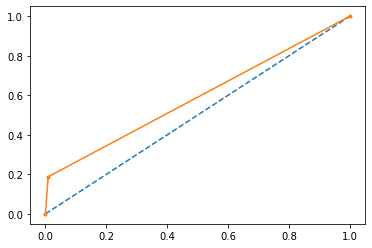

In [147]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict(X_test)
# keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

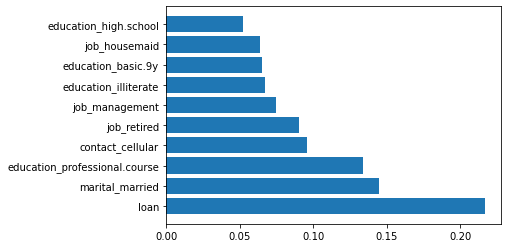

In [145]:
from matplotlib import pyplot as plt
from sklearn import svm
from matplotlib import pyplot as plt
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard teh abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

In [149]:
#by balcing y output
# After standardization our f1 score and auc percentage increases
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MODEL", "ACCURACY_score","precision_score","Recall_score","F1 score","AUC"]
x.add_row(["Dummy classifer",0.50, 0.50,1,0.66,"NAN"])
x.add_row(["Logistic Regression)", 0.73, 0.80,0.62,0.70,0.78])
x.add_row(["Random Forest",0.65, 0.85,0.38,0.52,0.766])
x.add_row(["SVM classifier",0.73, 0.82,0.60,0.69,0.73])
x.add_row(["XGB boost",0.74, 0.81,0.63,0.71,0.798])
x.add_row(["MLP  classifier with 3 layers",0.70, 0.74,0.61,0.67,0.745])
x.add_row(["MLP classifier with 2 layers",0.70, 0.75,0.61,0.68,0.76])
x.add_row(["MLP classifier 1 layers",0.72, 0.78,0.62,0.693,0.766])

print('Bank Marketing')
print(x)

Bank Marketing
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|             MODEL             | ACCURACY_score | precision_score | Recall_score | F1 score |  AUC  |
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|        Dummy classifer        |      0.5       |       0.5       |      1       |   0.66   |  NAN  |
|      Logistic Regression)     |      0.73      |       0.8       |     0.62     |   0.7    |  0.78 |
|         Random Forest         |      0.65      |       0.85      |     0.38     |   0.52   | 0.766 |
|         SVM classifier        |      0.73      |       0.82      |     0.6      |   0.69   |  0.73 |
|           XGB boost           |      0.74      |       0.81      |     0.63     |   0.71   | 0.798 |
| MLP  classifier with 3 layers |      0.7       |       0.74      |     0.61     |   0.67   | 0.745 |
|  MLP classifier with 2 layers |      0.7       |       0